In [ ]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)


def generate_students(n=200, seed=42):
    rng = np.random.default_rng(seed)
    hours_studied = rng.normal(5, 2, n).clip(1, 10)
    marks = (hours_studied * rng.uniform(8, 12, n) +
             rng.normal(0, 5, n)).clip(30, 100)
    gender = rng.choice(['Male', 'Female'], n)
    subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
    study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
    attempts = rng.integers(1, 4, n)
    return pd.DataFrame({
        'hours_studied': hours_studied.round(2),
        'marks': marks.round(2),
        'gender': gender,
        'subject': subject,
        'study_method': study_method,
        'attempts': attempts
    })


def generate_daily_sales(n=60, seed=42):
    rng = np.random.default_rng(seed)
    base = pd.date_range(start='2024-01-01', periods=n, freq='D')
    trend = np.linspace(50, 80, n)
    season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
    noise = rng.normal(0, 3, n)
    sales = (trend + season + noise).round(2)
    return pd.DataFrame({'date': base, 'sales': sales})


# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)

1.Using sales, draw a lineplot of date vs sales.


In [ ]:
import seaborn as sns
import plotly.express as px

<Axes: xlabel='date', ylabel='sales'>

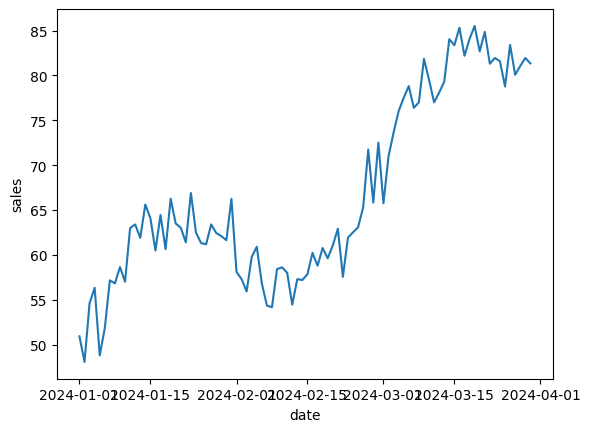

In [ ]:
sns.lineplot(data=sales, x='date', y='sales')

From students, plot hours_studied vs marks and color by gender.


<Axes: xlabel='hours_studied', ylabel='marks'>

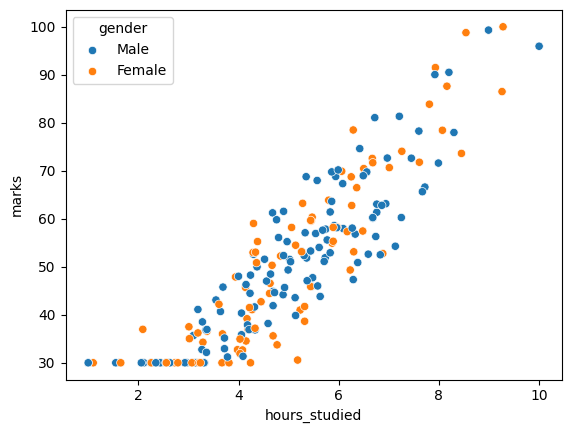

In [ ]:
sns.scatterplot(data=students, x='hours_studied', y='marks', hue='gender')

Plot a histogram of marks with a KDE overlay.


<Axes: xlabel='marks', ylabel='Count'>

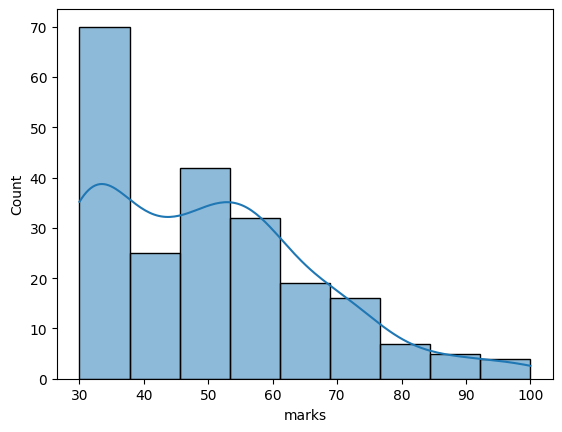

In [ ]:
sns.histplot(data=students, kde=True, x='marks')

Show the KDE curve for hours_studied.


<Axes: xlabel='hours_studied', ylabel='Density'>

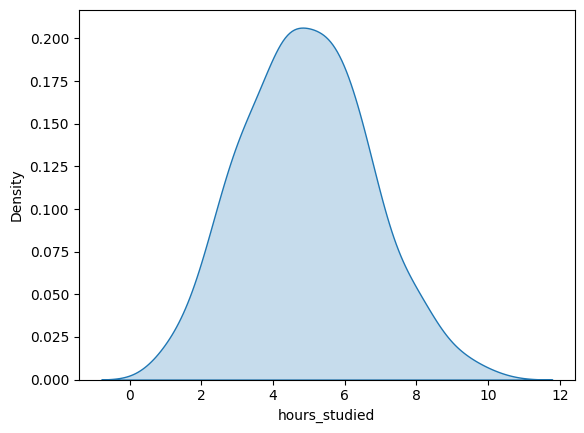

In [ ]:
sns.kdeplot(data=students, x='hours_studied', fill=True)

Display the count of records per subject.


<Axes: xlabel='subject', ylabel='count'>

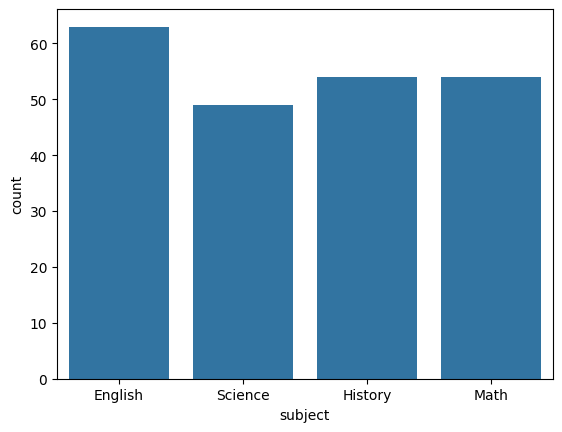

In [14]:
sns.countplot(data=students, x='subject')

Draw a regression line for hours_studied and marks.


<Axes: xlabel='hours_studied', ylabel='marks'>

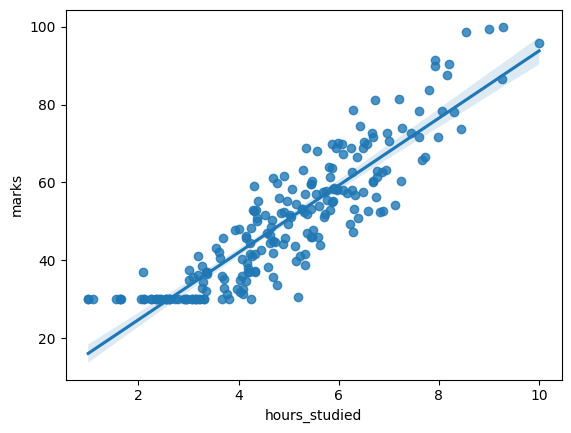

In [16]:
sns.regplot(data=students, x='hours_studied', y='marks')

Create a pairplot and a jointplot for students' dataset.


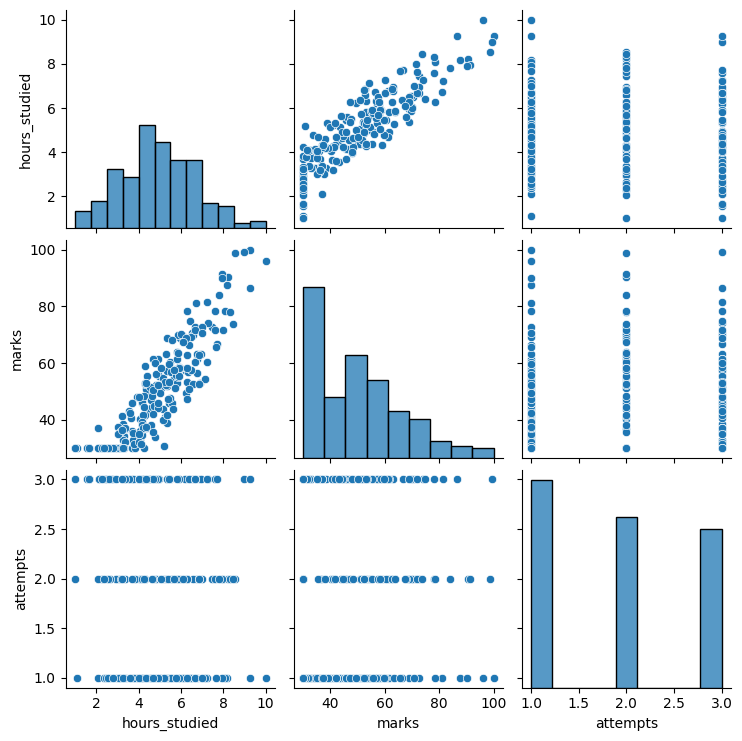

In [17]:
sns.pairplot(data=students)

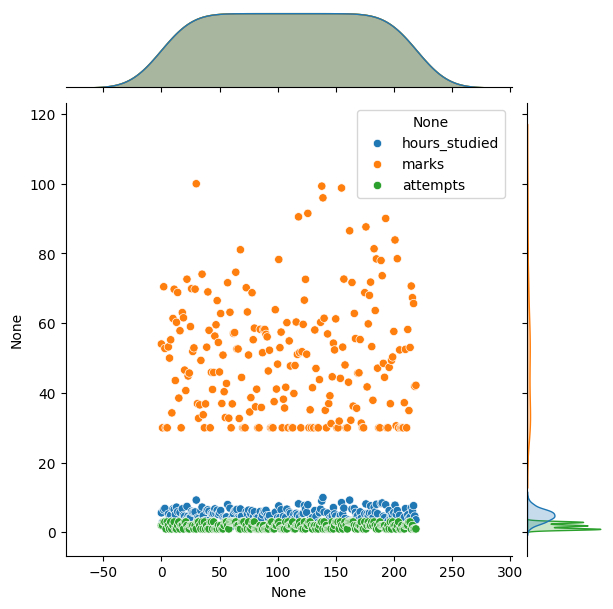

In [18]:
sns.jointplot(students)

Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.


In [ ]:
fig = px.scatter(students, x='hours_studied', y='marks', color='gender',)
fig.show()

Draw a line chart of sales over date and a histogram of marks using Plotly.


In [ ]:
fig1 = px.line(sales, x='date', y='sales')
fig1.show()

fig2 = px.histogram(students, x='marks', nbins=20)
fig2.show()